Build Chatbot for breast cancer

For faq

In [3]:
# Load Data
import pandas as pd

df = pd.read_csv("assets/sentences_classes.csv")

# assign sentences and labels
sentences = df['sentences']
y = df['class']

In [5]:
# test printout
print(df.head(5))
print(df.shape)

            sentences   class
0           กินได้ไหม  การกิน
1     กินได้หรือเปล่า  การกิน
2   เมนูกินได้รึเปล่า  การกิน
3    การกินของผู้ป่วย  การกิน
4  กินข้าวอะไรได้บ้าง  การกิน
(1923, 2)


findfont: Font family 'Sarabun' not found.
findfont: Font family 'Sarabun' not found.
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3637 (\N{THAI CHARACTER SARA II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 3585 (\N{THAI CHARACTER KO

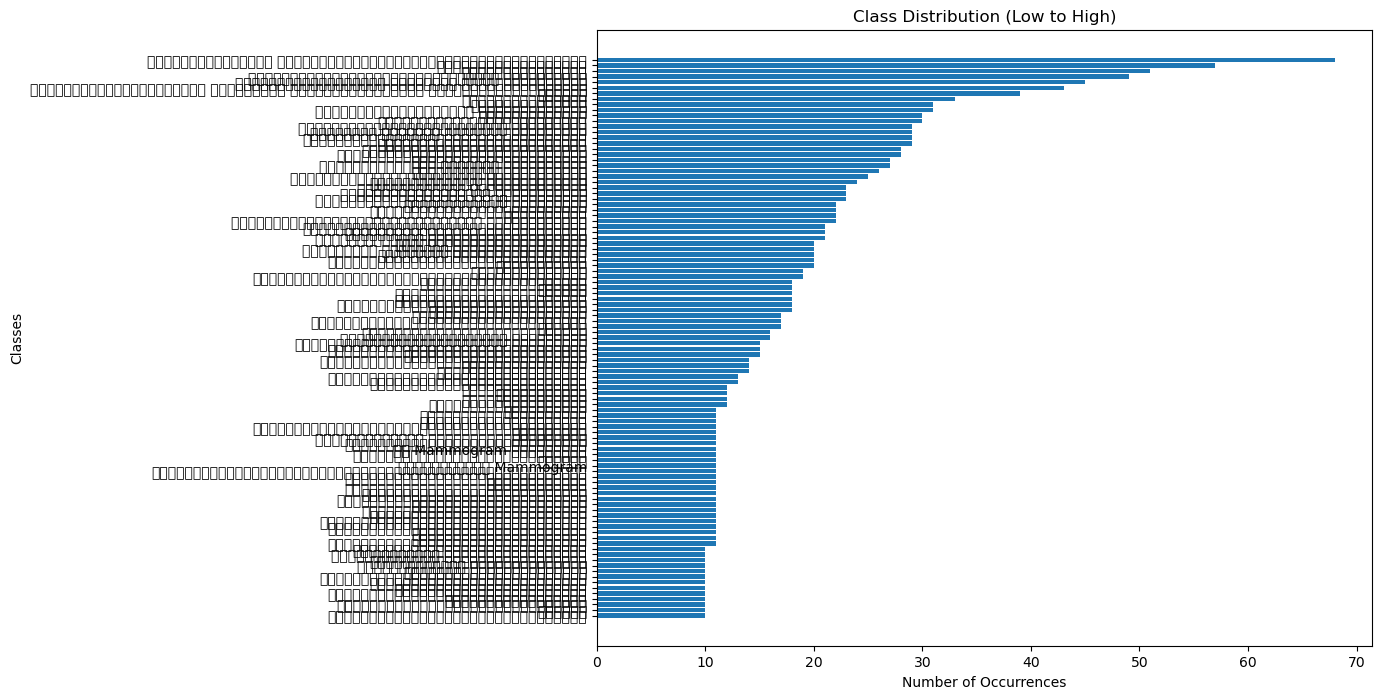

                                  class  count_class
0       วิธีการตรวจหาก้อนเนื้อด้วยตนเอง           10
1                                ถุงน้ำ           10
2        เมื่อไหร่ควรตรวจเอกซเรย์เต้านม           10
3                     การเอกซเรย์เต้านม           10
4       ทำอย่างไรเมื่อเป็นมะเร็งระยะแรก           10
..                                  ...          ...
63                          โกนผมได้ไหม           20
64      แขนข้างที่ผ่าตัดเจาะเลือดได้ไหม           20
65            วิธีการรักษาด้วยการผ่าตัด           20
66  ชาปลายมือ ปลายเท้า หลังให้ยาปกติไหม           20
67              ยามีผลข้างเคียงอะไรบ้าง           20

[68 rows x 2 columns]


,class,count_class
0,วิธีการตรวจหาก้อนเนื้อด้วยตนเอง,10
1,ถุงน้ำ,10
2,เมื่อไหร่ควรตรวจเอกซเรย์เต้านม,10
3,การเอกซเรย์เต้านม,10
4,ทำอย่างไรเมื่อเป็นมะเร็งระยะแรก,10
...,...,...
96,ถ้าปวดเมื่อยตามตัว ปวดศรีษะ ทานยาพาราได้ไหม,45
97,ทานอาหารเสริมหรือวิตามินได้ไหม หลังผ่าตัด,49
98,ฉีดวัคซีนได้ไหม,51
99,อาการหลังการฉายแสง,57


In [ ]:
# count classesimport matplotlib.pyplot as plt
import matplotlib

# Set the font to one that supports Thai characters
matplotlib.rcParams['font.family'] = 'assets/Sarabun-Regular.ttf'


# Count occurrences of each class
class_counts = y.value_counts().sort_values(ascending=True)

# Convert to DataFrame
class_counts_df = pd.DataFrame(class_counts).reset_index()
class_counts_df.columns = ['class', 'count_class']

# Plot graph
plt.figure(figsize=(10,8))
plt.barh(class_counts_df['class'], class_counts_df['count_class'])
plt.xlabel('Number of Occurrences')
plt.ylabel('Classes')
plt.title('Class Distribution (Low to High)')
plt.show()

print(class_counts_df[class_counts_df['count_class']<=20])
class_counts_df

In [ ]:
# count class

In [ ]:
from pythainlp.tokenize import word_tokenize
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical



# Tokenize Thai text
X_tokenized = df['sentences'].apply(word_tokenize, keep_whitespace=False)

# Step 1: Convert tokens to sequences of integers
word_to_index = {}
index = 1  # Start indexing from 1
for tokens in X_tokenized:
    for word in tokens:
        if word not in word_to_index:
            word_to_index[word] = index
            index += 1

# Convert tokenized sentences into integer sequences
tts = X_tokenized.apply(lambda tokens: [word_to_index[word] for word in tokens])

# Encode Labels
num_classes = len(np.unique(y)) 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to numbers
y_categorical = to_categorical(y_encoded, num_classes=num_classes)  # Convert labels to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(tts, y_categorical, test_size=0.25, random_state=99)

# Find max length of the sentences for padding
maxlen = max([len(s) for s in tts])
print(f"Max sentence length = {maxlen}")

# Padding sequences to make them the same length
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Define model parameters
embedding_dim = 50
vocab_size = len(word_to_index) + 1  # Adding 1 for padding token

# Build Bi-LSTM Model
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))

# Bidirectional LSTM Layer with Dropout and BatchNormalization
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# GlobalMaxPooling1D to reduce dimensions and keep the important features
model.add(GlobalMaxPooling1D())

# Dense Layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# Output Layer (Softmax for classification)
model.add(Dense(num_classes, activation='softmax'))

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Add EarlyStopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_data=(X_test, y_test),
                    # callbacks=[early_stopping],
                    verbose=2)

# Evaluate the model
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=False)
print(f"Training Accuracy: {train_acc:.4f}")

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=False)
print(f"Testing Accuracy: {test_acc:.4f}")
